# Object Detection in Python

In this code along session, we will use and evaluate different pre-trained models
to run object detection on images using Python and torch.

We will be using the [COCO dataset](https://cocodataset.org/#home), which
we will access and explore using ApertureDB.

At the end of the code along session, you will:
1. Learn how to run different object detection models on PyTorch.
3. Learn how to create and retrieve a dataset using ApertureDB.
4. Learn how to evaluate the performance of a model.


## Task 1

We will start by setting up and using 3 pre-trained models:
* Faster R-CNN with a ResNet50 backbone: more accurate, but slower
* Faster R-CNN with a MobileNet v3 backbone: faster, but less accurate
* RetinaNet: balance between speed and accuracy.

In [5]:
!pip install --upgrade aperturedb[complete]

c:\Users\akmal\anaconda3\envs\pytorch_env\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\akmal\anaconda3\envs\pytorch_env\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=RetinaNet_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=RetinaNet_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Users\akmal\anaconda3\envs\pytorch_env\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained_backbone' is deprecated since 0.13 and may be removed in the future, please use 'weights_backbone' instead.
  warnings.warn(
c:\Users\akmal\anaconda3\envs\pytorch_env\Lib\site-packag

Downloading: "https://download.pytorch.org/models/retinanet_resnet50_fpn_coco-eeacb38b.pth" to C:\Users\akmal/.cache\torch\hub\checkpoints\retinanet_resnet50_fpn_coco-eeacb38b.pth


100%|██████████| 130M/130M [00:14<00:00, 9.18MB/s] 


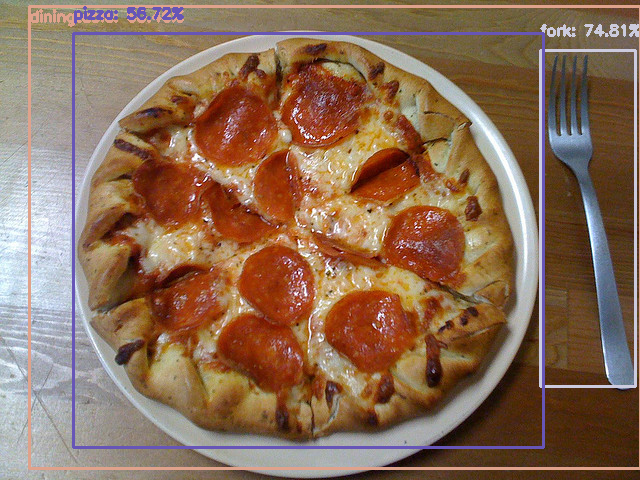

In [2]:
import cv2
from PIL import Image
from IPython.display import display as ds

from infer import BboxDetector as BboxDetector

# We read a sample image
# img = cv2.imread("images/000000269121.jpg") # tennis player
img = cv2.imread("images/000000351331.jpg") # pizza 
# convert the image from BGR to RGB channel ordering and change the
# image from channels last to channels first ordering for display
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

choices=["frcnn-resnet", "frcnn-mobilenet", "retinanet"]

detector = BboxDetector(model_name="retinanet")

detections = detector.infer(img)

ds(Image.fromarray(detector.get_last_infer_img()))

## Task 2

Now, let's compare the performance of the three pre-trained models.


c:\Users\akmal\anaconda3\envs\pytorch_env\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to C:\Users\akmal/.cache\torch\hub\checkpoints\fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


100%|██████████| 160M/160M [00:16<00:00, 9.95MB/s] 


frcnn-resnet took: 3.70s


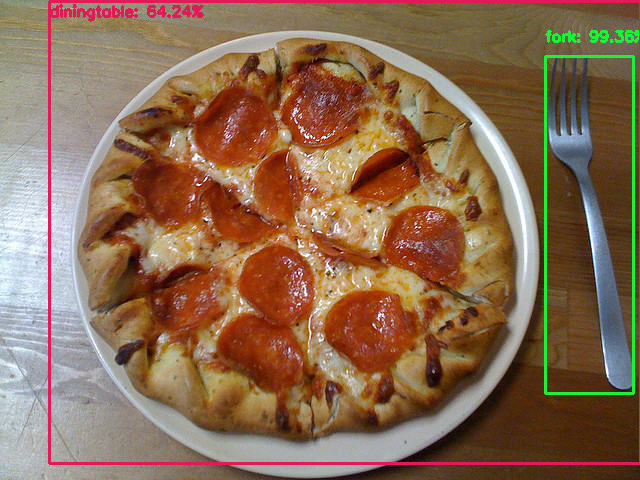

c:\Users\akmal\anaconda3\envs\pytorch_env\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_MobileNet_V3_Large_320_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_MobileNet_V3_Large_320_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Users\akmal\anaconda3\envs\pytorch_env\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights_backbone' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights_backbone=MobileNet_V3_Large_Weights.IMAGENET1K_V1`. You can also use `weights_backbone=MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/fasterrcnn_mobilenet_v3_large_320_fpn-907ea3f9.pth" to C:\Users\akmal/.cache\torch\hub\checkpoints\fasterrcnn_mobilenet_v3_large_320_fpn-907ea3f9.pth


100%|██████████| 74.2M/74.2M [00:16<00:00, 4.79MB/s]


frcnn-mobilenet took: 0.26s


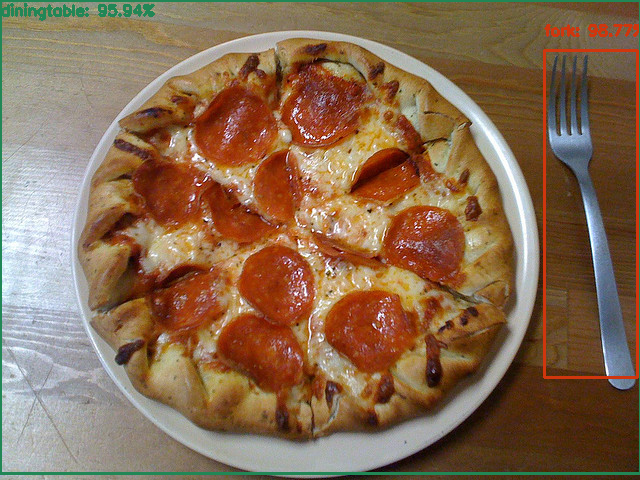

retinanet took: 3.20s


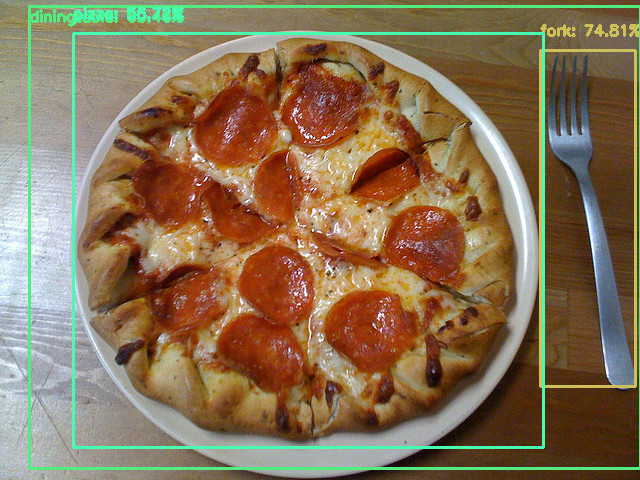

In [3]:
import time

for model in choices:
    detector = BboxDetector(model_name=model)

    start = time.time()
    detections = detector.infer(img)
    print(f"{model} took: {(time.time() - start):.2f}s", flush=True)
    ds(Image.fromarray(detector.get_last_infer_img()))

Now let's check the throughput for multiple images

In [4]:
detector = BboxDetector(model_name="retinanet")

start = time.time()
imgs = 0

for i in range(100):
    detector.infer(img) # use the last image
    imgs += 1
    if imgs % 5 == 0:
        print(f"\r{(imgs / (time.time() - start)):.2f} imgs/s \t", end="", flush=True)
        # start = time.time()
        # imgs = 0

print("\nDone.")

0.32 imgs/s 	
Done.
